In [1]:
"""
清洗数据后------数据分析---BMI特征分析
"""
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus'] = False
"""
参考

      Pregnancies     Glucose  BloodPressure        BMI  DiabetesPedigreeFunction        Age  Outcome
非糖尿病     3.298000  110.643863      71.114000  30.960000                  0.429734  31.190000      0.0
糖尿病      4.865672  142.319549      75.988806  35.409701                  0.550500  37.067164      1.0

"""
# ---------------------------------- get data -------------------------------
pima_data = pd.read_csv("../data/cleaned_pima_data.csv")


In [2]:
# ------------计算数据------------
statistics = pima_data["BMI"].describe()

statistics['range'] = statistics['max'] - statistics['min']  # 极差
statistics['var'] = statistics['std'] / statistics['mean']  # 方差
statistics['dis'] = statistics['75%'] - statistics['25%']  # 四分距
statistics

count    768.000000
mean      32.512760
std        6.930700
min       18.200000
25%       27.500000
50%       32.400000
75%       36.725000
max       67.100000
range     48.900000
var        0.213169
dis        9.225000
Name: BMI, dtype: float64

In [3]:
# -------------------------查看bmi的值大于45的情况-------------------------
print("--------查看bmi的值大于45的情况-------")
check = pima_data.loc[pima_data["BMI"] > 45]
print("总共有%d人" % check.shape[0])
# 总共有36人

"""
可见,其一样本:bmi值高达46和49,但是她们没有得病,她们的血压和葡萄糖都很低,这些原因极有可能能够降低糖尿病的发生;

其一样本: BMI值是53.2,非常高,她得糖尿病了,虽然她很年轻才25岁,血压也很低76,但是她的葡萄糖很高162 + BMI是53.2,
就算她很年轻,葡萄糖和bmi都高,都会导致糖尿病的发生
"""
check.head(8)



--------查看bmi的值大于40的情况-------
总共有36人


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118.0,84,45.8,0.551,31,1
43,9,171.0,110,45.4,0.721,54,1
57,0,100.0,88,46.8,0.962,31,0
60,2,84.0,66,49.4,0.304,21,0
84,5,137.0,108,48.8,0.227,37,1
92,7,81.0,78,46.7,0.261,42,0
99,1,122.0,90,49.7,0.325,31,1
120,0,162.0,76,53.2,0.759,25,1


In [4]:
# -------------------------查看bmi的值大于45,但不得糖尿病的情况-------------------------
print("--------bmi的值大于45,但不得糖尿病的情况-------")
check = pima_data.loc[(pima_data["BMI"] > 45) & (pima_data["Outcome"] == 0)]
print("总共有%d人" % check.shape[0])
# 总共有36人
check.head(8)

--------bmi的值大于45,但不得糖尿病的情况-------
总共有14人


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88,46.8,0.962,31,0
60,2,84.0,66,49.4,0.304,21,0
92,7,81.0,78,46.7,0.261,42,0
229,0,117.0,80,45.2,0.089,24,0
247,0,165.0,90,52.3,0.427,23,0
335,0,165.0,76,47.9,0.259,26,0
420,1,119.0,88,45.3,0.507,26,0
469,6,154.0,78,46.1,0.571,27,0


In [5]:
print(check.mean(axis=0))
"""
Pregnancies                   2.214286  糖尿病该特征均值4.86,非糖均值:3.29
Glucose                     117.071429  糖尿病该特征均值140,非糖均值:110
BloodPressure                79.714286  糖尿病该特征均值75,非糖均值:71
BMI                          47.614286  糖尿病该特征均值35,非糖均值:30
DiabetesPedigreeFunction      0.537214  糖尿病该特征均值0.55,非糖均值:0.42
Age                          31.714286  糖尿病该特征均值37,非糖均值:31
Outcome                       0.000000
dtype: float64

bmi的值高,不得糖尿病的人当中,怀孕次数比较少,尤其是血压低
由此可见,身体肥胖的人,把血压降低,葡萄糖降低,怀孕次数减少,可以一定程度上降低糖尿病的发生
"""


Pregnancies                   2.214286
Glucose                     117.071429
BloodPressure                79.714286
BMI                          47.614286
DiabetesPedigreeFunction      0.537214
Age                          31.714286
Outcome                       0.000000
dtype: float64


'\nPregnancies                   2.214286  糖尿病该特征均值4.86,非糖均值:3.29\nGlucose                     117.071429  糖尿病该特征均值140,非糖均值:110\nBloodPressure                79.714286  糖尿病该特征均值75,非糖均值:71\nBMI                          47.614286  糖尿病该特征均值35,非糖均值:30\nDiabetesPedigreeFunction      0.537214  糖尿病该特征均值0.55,非糖均值:0.42\nAge                          31.714286  糖尿病该特征均值37,非糖均值:31\nOutcome                       0.000000\ndtype: float64\n\nbmi的值高,不得糖尿病的人当中,怀孕次数比较少,尤其是血压低\n由此可见,身体肥胖的人,把血压降低,葡萄糖降低,怀孕次数减少,可以一定程度上降低糖尿病的发生\n'

In [6]:
# -------------------------查看bmi的值小于25,但得糖尿病的情况-------------------------
print("--------查看bmi的值小于25,但得糖尿病的情况-------")
check = pima_data.loc[(pima_data["BMI"] < 25) & (pima_data["Outcome"] == 1)]
print("总共有%d人" % check.shape[0])
# 总共有7人
check.head(8)

--------查看bmi的值小于25,但得糖尿病的情况-------
总共有7人


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64,23.3,0.672,32,1
93,4,134.0,72,23.8,0.277,60,1
197,3,107.0,62,22.9,0.678,23,1
319,6,194.0,78,23.5,0.129,59,1
646,1,167.0,74,23.4,0.447,33,1
676,9,156.0,86,24.8,0.230,53,1
749,6,162.0,62,24.3,0.178,50,1


In [7]:
print(check.mean(axis=0))
"""
Pregnancies                   5.285714  糖尿病该特征均值4.86,非糖均值:3.29
Glucose                     157.571429  糖尿病该特征均值140,非糖均值:110
BloodPressure                71.142857  糖尿病该特征均值75,非糖均值:71
BMI                          23.714286  糖尿病该特征均值35,非糖均值:30
DiabetesPedigreeFunction      0.373000  糖尿病该特征均值0.55,非糖均值:0.42
Age                          44.285714  糖尿病该特征均值37,非糖均值:31
Outcome                       1.000000  
dtype: float64

bmi的值小于25,但得糖尿病的人, 明显怀孕次数是比较高的,而且葡萄糖的值也是很高的
"""



Pregnancies                   5.285714
Glucose                     157.571429
BloodPressure                71.142857
BMI                          23.714286
DiabetesPedigreeFunction      0.373000
Age                          44.285714
Outcome                       1.000000
dtype: float64


'\nPregnancies                   5.285714  糖尿病该特征均值4.86,非糖均值:3.29\nGlucose                     157.571429  糖尿病该特征均值140,非糖均值:110\nBloodPressure                71.142857  糖尿病该特征均值75,非糖均值:71\nBMI                          23.714286  糖尿病该特征均值35,非糖均值:30\nDiabetesPedigreeFunction      0.373000  糖尿病该特征均值0.55,非糖均值:0.42\nAge                          44.285714  糖尿病该特征均值37,非糖均值:31\nOutcome                       1.000000  \ndtype: float64\n\nbmi的值小于25,但得糖尿病的人, 明显怀孕次数是比较高的,而且葡萄糖的值也是很高的\n'

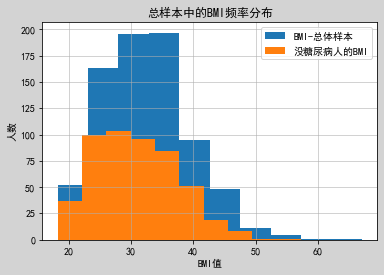

In [8]:
# ------------------------------------数据可视化展示------------------------------
# -------------draw 1 --------------
mp.figure("总样本中的BMI频率分布", facecolor="lightgray")
mp.title("总样本中的BMI频率分布")
pima_data["BMI"].hist(label="BMI-总体样本")
pima_data.loc[pima_data["Outcome"] == 0, "BMI"].hist(label="没糖尿病人的BMI")
mp.xlabel("BMI值")
mp.ylabel("人数")
mp.grid()
mp.legend()
mp.grid(":", alpha=0.7)
mp.show()



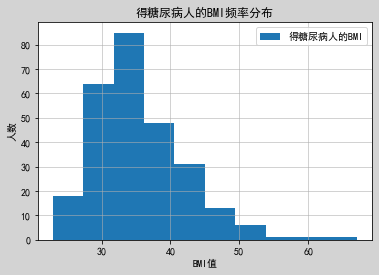

In [9]:
# -------------draw 2 --------------
mp.figure("得糖尿病人的BMI频率分布", facecolor="lightgray")
mp.title("得糖尿病人的BMI频率分布")
pima_data.loc[pima_data["Outcome"] == 1, "BMI"].hist(label="得糖尿病人的BMI")
mp.xlabel("BMI值")
mp.ylabel("人数")
mp.grid()
mp.legend()
mp.grid(":", alpha=0.7)
mp.show()

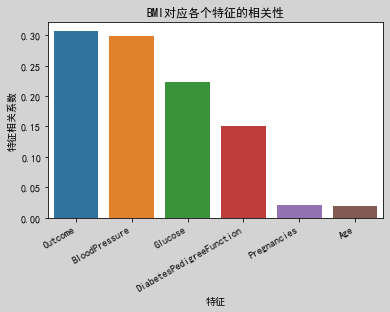

In [10]:
# -------------draw 3 --------------
# draw heatmap  计算数据：　皮尔逊积矩相关系数　　　各个特征的相关系数
cols = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_corr = pima_data[cols].corr()

#   draw bar  BMI对应各个特征的相关性
mp.figure("BMI对应各个特征的相关性", facecolor="lightgray")
mp.title("BMI对应各个特征的相关性")
df_barplot = df_corr["BMI"].sort_values()[::-1].drop("BMI")
sns.barplot(df_barplot.index, df_barplot)
mp.gcf().autofmt_xdate()
mp.xlabel("特征")
mp.ylabel("特征相关系数")
mp.show()
